импорт всех нужных библиотек

In [1]:
from sklearn.model_selection import train_test_split
import torch
import sys
import os
from model import Trainer,three_layer,up_three_layer,up_three_layer_multi,ImprovedRegressionNN

import matplotlib.pyplot as plt
#путь к корню директории
#from setting import BASE_DIR
BASE_DIR = os.path.dirname(os.path.dirname(os.getcwd()))
sys.path.append(os.path.abspath(BASE_DIR))
from data_preparation import PreparationDataset
from show_analysis import LossVisualizer

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)

cuda


Загрузка и подготовка данных для анализа и обучения модели.<br>
разбиение на train,test


In [3]:
path = BASE_DIR + '\data_all'  # Путь к данным
PD = PreparationDataset(path)

# параметры подготовки данных
pd_params = (10,9,50,1)
window_size,num_features,downsample_step,target_window_size = pd_params 

# Подготовка данных
X, y, df = PD.vec_to_vec(
    window_size,
    num_features,
    downsample_step,
    target_window_size,
    device=device  
)

# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = PD.PDtrain_test_split(
    X, y, test_size=0.33, random_state=42
)

In [4]:
#инициализация модели
model = ImprovedRegressionNN( 
    input_size = X_train.shape[1], # window_size*num_features - 1
    output_size = target_window_size,
    hidden_size1 = 128,
    hidden_size2 = 128,
    hidden_size3 = 128,
    device = device)

trainer = Trainer(
    model=model,
    learning_rate=0.001,
    device= device
)

In [5]:
history = trainer.fit(
    X=X_train,
    y=y_train,
    X_t=X_test,
    y_t=y_test,
    batch_size=32,
    epochs=400,
    loss_tube=5
)

Epoch 10
Main: 0.321893, MAPE: 0.153265
Test - MAPE: 0.463933, Tube: 0.005726
Epoch 40
Main: 0.276442, MAPE: 0.129688
Test - MAPE: 0.059334, Tube: 0.542084
Epoch 80
Main: 0.279221, MAPE: 0.132094
Test - MAPE: 0.052997, Tube: 0.615517
Epoch 120
Main: 0.281026, MAPE: 0.131282
Test - MAPE: 0.060221, Tube: 0.520899
Epoch 160
Main: 0.279100, MAPE: 0.131672
Test - MAPE: 0.065853, Tube: 0.475379
Epoch 200
Main: 0.275811, MAPE: 0.130077
Test - MAPE: 0.059810, Tube: 0.525480
Epoch 240
Main: 0.275641, MAPE: 0.130641
Test - MAPE: 0.053780, Tube: 0.599771
Epoch 280
Main: 0.280063, MAPE: 0.131920
Test - MAPE: 0.070117, Tube: 0.391497
Epoch 320
Main: 0.286693, MAPE: 0.135042
Test - MAPE: 0.056318, Tube: 0.579874
Epoch 360
Main: 0.278833, MAPE: 0.130810
Test - MAPE: 0.068951, Tube: 0.421701
Epoch 400
Main: 0.279367, MAPE: 0.130745
Test - MAPE: 0.054034, Tube: 0.588176


In [10]:
from model_history import ModelHistory
MH = ModelHistory(history)
MH.save_history_json(filename = BASE_DIR+'\loss_history/all_loss.json',model_name = 'ImprovedRegressionNN')
# key = MH.add_result(
#         filename = BASE_DIR+'\\resualt/main.json',
#         model_name = 'ImprovedRegressionNN',
#         result = 'best',
#         message = 'first',
#         params = {'input_size': X_train.shape[1], # window_size*num_features - 1
#                   'output_size': target_window_size,
#                   'hidden_size1': 64,
#                   'hidden_size2': 64,
#                   'hidden_size3': 64,
#                   'lr':0.001,
#                   'batch_size':64}
#         )
# key

In [11]:
LV = LossVisualizer(history)

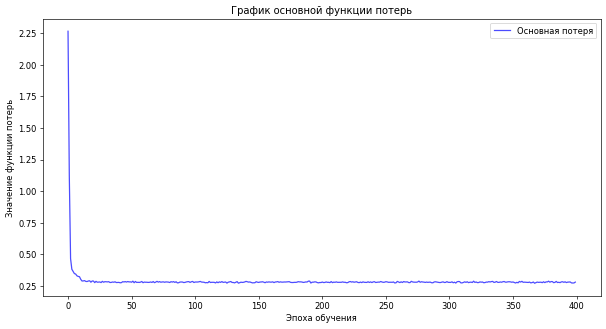

In [12]:
LV.show_training_loss()

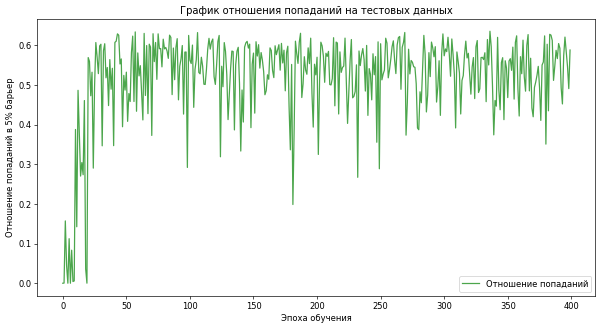

In [13]:
LV.show_test_tube()

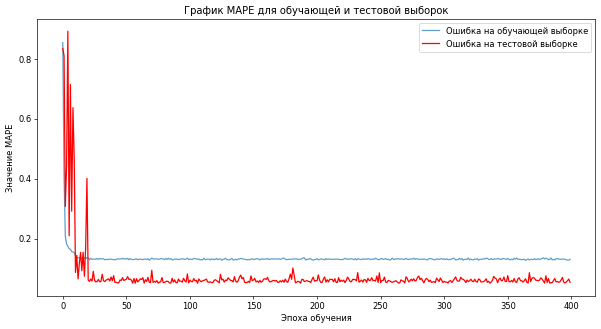

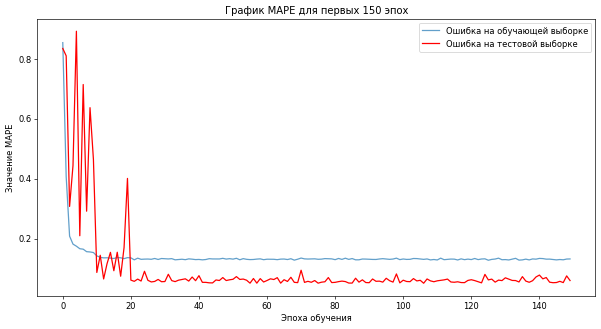

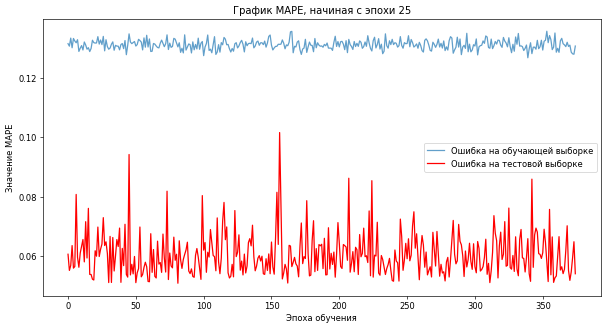

In [14]:
LV.show_mape(start_epoch = 25)

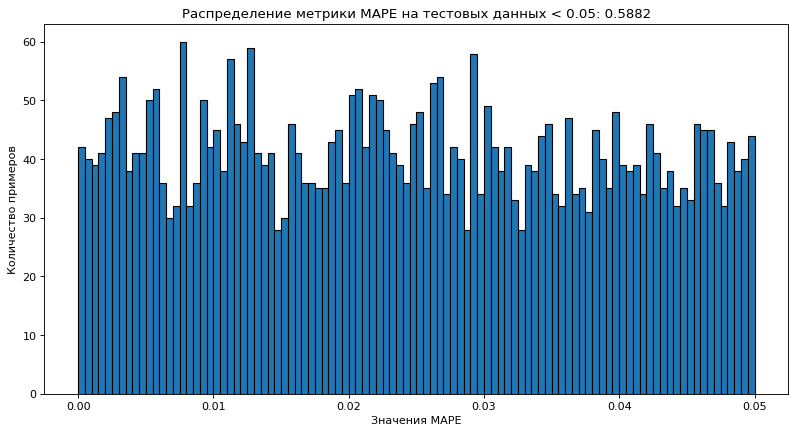

Процент значений MAPE < 0.05: 0.5882


In [15]:
LV.histogram_mape(model,X_test,y_test,limit_percel = 5)

In [16]:
LV.show_predictions(model,df,pd_params,device)

Количество записей: 5334


AttributeError: 'ImprovedRegressionNN' object has no attribute 'predict'